# Advertising Sales Channel Prediction

## Problem Statement:

Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. Predict the total sales generated from all the sales channel.  

In [1]:
# importing Important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")
print("import complete")

import complete


### Loading dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [3]:
#checking first five rows of dataset 
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#checking the dataset from last 5 rows
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
# checking the shape of the dataset
df.shape

(200, 5)

In [6]:
#dataset has 200 rows and 5 columns

In [7]:
# checking column names
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [8]:
# from the columns names 'Unnamed: 0' column looks unnecessary so will be dropping the column
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
# checking datatypes
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [10]:
# all the columns are numeric and are of sloat data type

In [11]:
# checking info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
# checking for null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [13]:
# there are no missing values in the dataset

In [14]:
# checking sataistical summary of the datatset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [15]:
#the above table gives the statistical summary of the dataset

In [16]:
# checking the corelation of the dataset
cor = df.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [17]:
# the above table gives  correlation between all the variables 1.00 being the highest coreelation

In [18]:
#checking corrlation of different channels with sales
cor["sales"].sort_values(ascending=False).drop(['sales'])

TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

In [19]:
# tv ads have the highest correlation whereas newspaper having the least

### Visualisation and analysis

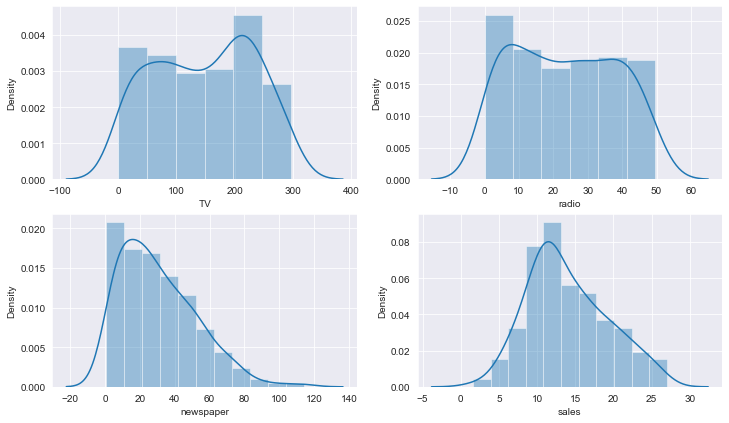

In [20]:
# will checking distribution of the variabes
plt.figure(figsize=(12,7))
plot = 1
for i in df.columns:
    plt.subplot(2,2,plot)
    sns.distplot(df[i])
    plot+=1
plt.show()

From the above plot we can see that none of them is normally distributed although sales column has less skewness and newspaper looks like it has high skewness among all other variables

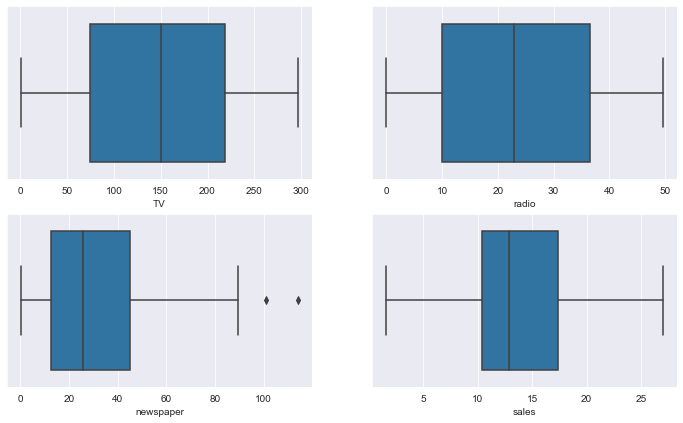

In [21]:
# plotting box plots and will visualise the plot for presence of outliers
plt.figure(figsize=(12,7))
plot = 1
for i in df.columns:
    plt.subplot(2,2,plot)
    sns.boxplot(df[i])
    plot+=1
plt.show()

From the above plot we can see that teher are only some outliers in newspaper column

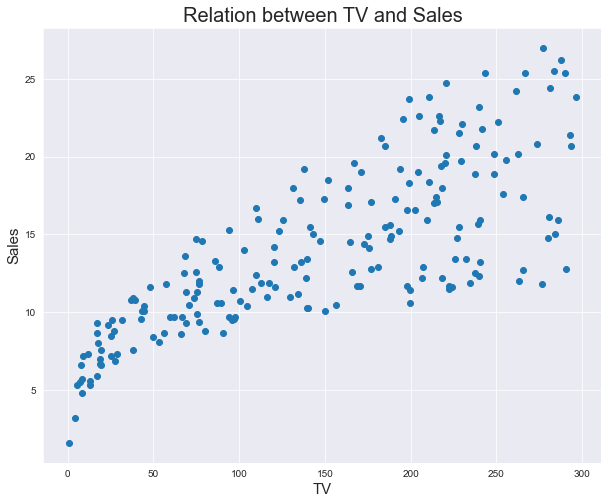

In [22]:
# will check relationship between TV and Sales
plt.figure(figsize=(10,8))
plt.title("Relation between TV and Sales",fontsize=20)
plt.scatter(df.TV,df.sales)
plt.xlabel("TV",fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.show()

The above plot shows there is a linear relationship between Tv and sales i.e. Tv advertising is a good factor in sales of products.

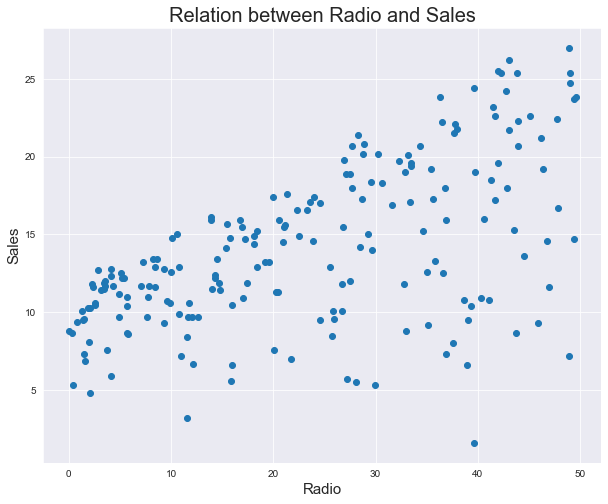

In [23]:
# will relationship between radio and sales
plt.figure(figsize=(10,8))
plt.title("Relation between Radio and Sales",fontsize=20)
plt.scatter(df.radio,df.sales)
plt.xlabel("Radio",fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.show()

The above plot shows that there is a somewhat a linear relation radio and sales i.e. it is not necessary that radio channels will be taht much of a good factor in sales of products.

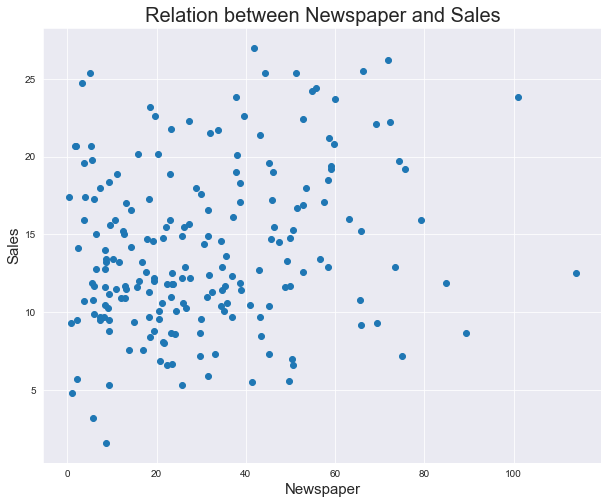

In [24]:
# will relationship between newspaper and sales
plt.figure(figsize=(10,8))
plt.title("Relation between Newspaper and Sales",fontsize=20)
plt.scatter(df.newspaper,df.sales)
plt.xlabel("Newspaper",fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.show()

From the above plot we can see that there is not a significant relation between newspaper and sales so we cannot strongly say that newspaper advertising is a good factor for sales or not.

##### Will be checking regression plots for the different adverstising channels

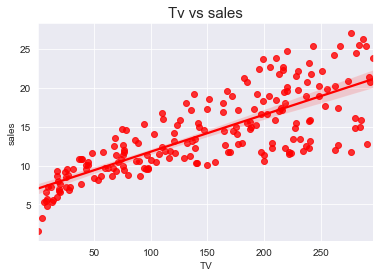

In [25]:
plt.title("Tv vs sales",fontsize=15)
sns.regplot("TV","sales",data=df,color='r')
plt.show()

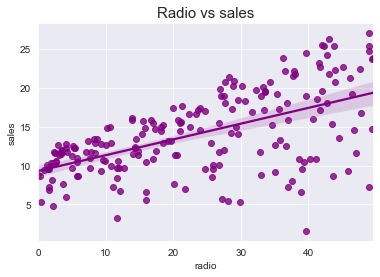

In [26]:
plt.title("Radio vs sales",fontsize=15)
sns.regplot("radio","sales",data=df,color='purple')
plt.show()

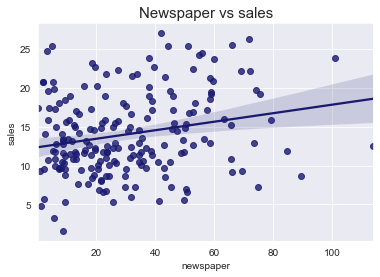

In [27]:
plt.title("Newspaper vs sales",fontsize=15)
sns.regplot("newspaper","sales",data=df,color='midnightblue')
plt.show()

From the above plots we can infer that Tv fits the regression model best than newspaper.

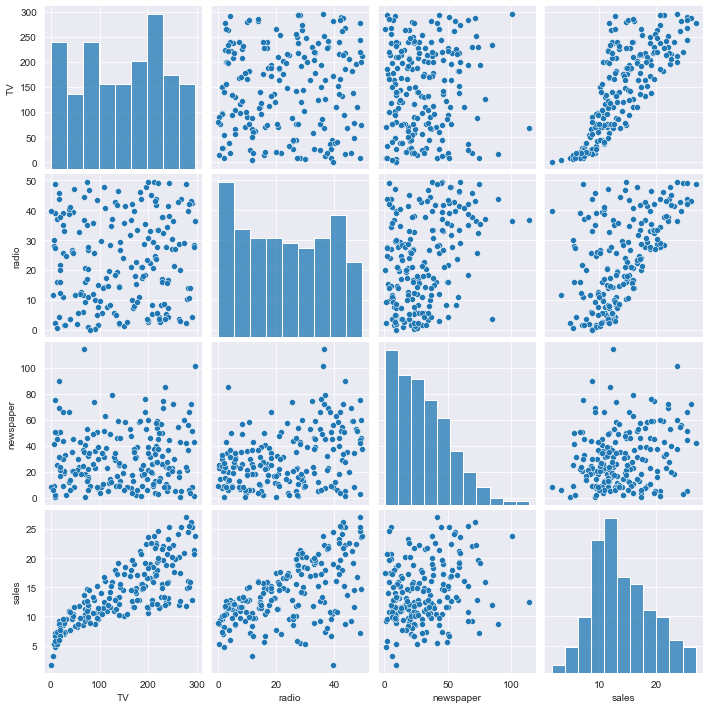

In [28]:
sns.pairplot(df)

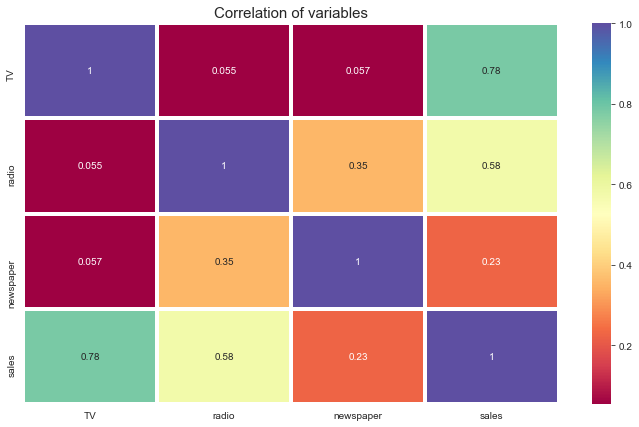

In [29]:
#will be visualising correlation of the all the variableplt.figure(figsize=(12,7))
plt.figure(figsize=(12,7))
plt.title("Correlation of variables",fontsize=15)
sns.heatmap(cor,annot=True,linewidth = 3, linecolor='white',cmap='Spectral')
plt.show()

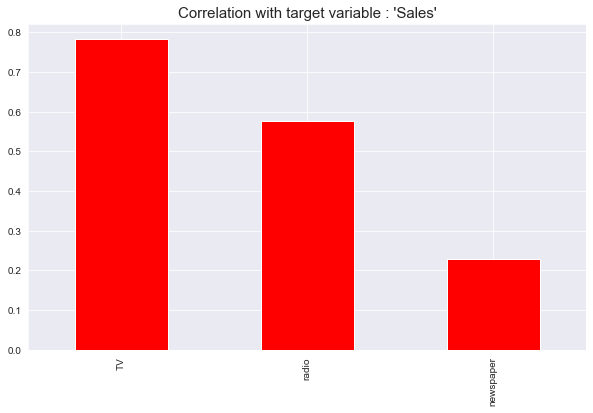

In [30]:
# will be plotting correlation between target variable i.e. sales and feature variables i.e. advertising channels
plt.title("Correlation with target variable : 'Sales'",fontsize=15)
cor["sales"].sort_values(ascending=False).drop(['sales']).plot(kind='bar',figsize=(10,6),color='r')
plt.show()

From above plot we can visualise that Tv advertising is highly correlated with sales and newspaper least.

### Data Cleaning and preparation

#### checking for missing values

In [31]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

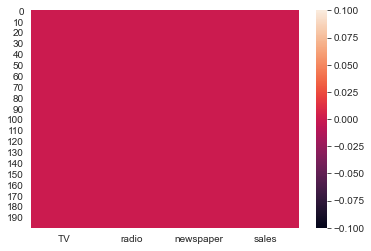

In [32]:
sns.heatmap(df.isnull())

Therefore by analysis and visualtion of missing values we conclude there are no missing values in the dataset

#### analysis and removal of outliers

In [33]:
# identifying outliers using zscore
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [34]:
#printing the indexes of outliers
print(np.where(z>3))

(array([ 16, 101]), array([2, 2]))


In [35]:
df2 = df[(z<3).all(axis=1)]
df2.shape

(198, 4)

In [36]:
#### checking skewness of the data
df2.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [39]:
#newspaper is skewed i.e. greater than 5will be treating it
df2.newspaper = np.cbrt(df.newspaper)

In [40]:
df2.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.341008
sales        0.407130
dtype: float64

### Splitting the dataset into feature and target variables

In [41]:
X = df.drop(['sales'],axis=1)
y = df['sales']

In [43]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [44]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [45]:
### we will have to scale the features first because there is lot of difference in range

##### Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [50]:
x=pd.DataFrame(scaled, columns=X.columns)
x.head()

,TV,radio,newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


### Will be fitting the model using ols method to check the importance of the features

In [54]:
import statsmodels.api as sm

x_ = sm.add_constant(x)
mod = sm.OLS(y,x_)

In [56]:
results = mod.fit()
results.params

const        14.022500
TV            3.919254
radio         2.792063
newspaper    -0.022539
dtype: float64

params represent the intercept and coefficients of features of the best fit line

In [58]:
#will be looking at the summary of the model to have look at the statistical info for features
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 29 May 2021   Prob (F-statistic):           1.58e-96
Time:                        10:57:29   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0225      0.119    117.655      0.0

In this case 
H0 : weights of features are closer or equal to zero
H1 : weights of features are non-zero

From the above summary we can see that t-test value is so small lesser than 1 and p-value is larger than 0.05 due to which we fail to reject null hypothesis which means coefficient of feature newspaper is closer or equal to zero.

So we will drop this feature s it is not significant for modeeling and prediction.

So, infering that radio and TV are highly important features for our target column to predict the right sales price.

In [ ]:
# will be dropping the newspaper feature for better prediction
x.drop(['newspaper'],axis=1,inplace=True)

### Model Building 

#### Finding best random state

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxacc=0
maxrs=0
for i in range(1,200):
    LR = LinearRegression()
    xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=i)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    acc = r2_score(ytest,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Best accuracy is : ", maxacc, " best random state : ", maxrs)

Best accuracy is :  0.9401629906229886  best random state :  154


In [68]:
#splitting into training and testing sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=154)

In [69]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV

In [75]:
# intialising all the models
LR = LinearRegression()
lasso = Lasso()
ridge = Ridge()
KNN = KNeighborsRegressor()
SV = SVR()
DTR = DecisionTreeRegressor()
RTF = RandomForestRegressor()
ADB = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [76]:
# list of model name and instances
models = [("Linear Regression ",LR),
          ("Lasso Regressor",lasso),
          ("Ridge Regressor",ridge),
          ("K Nearest Neighbor Regressor ",KNN),
          ("Support Vector Regressor ",SV),
          ("Decision Tree Regressor ",DTR),
          ("Random forest Regressor ",RTF),
          ("AdaBoost Regressor ",ADB),
          ("Gradient Boosting Regressor ",GB)]

In [77]:
# loop for model training, prediction and evaluation
for name, model in models:
    print("*****",name,"*****")
    model.fit(xtrain,ytrain)
    print("\n",model)
    pred = model.predict(xtest)
    
    print('R2_score',r2_score(ytest,pred))
    print('Cross val score',cross_val_score(model,X,y,scoring="r2",cv=5).mean())
    print('MAE',mean_absolute_error(ytest,pred))
    print('MSE',mean_squared_error(ytest,pred))
    print('RMSE',np.sqrt(mean_squared_error(ytest,pred)),"\n")

***** Linear Regression  *****

 LinearRegression()
R2_score 0.9401629906229886
Cross val score 0.8871063495438436
MAE 1.0751963392649837
MSE 1.8691185228608953
RMSE 1.3671570951653271 

***** Lasso Regressor *****

 Lasso()
R2_score 0.8397659894187449
Cross val score 0.8882007416256036
MAE 1.6855755868339664
MSE 5.00520263776376
RMSE 2.2372310202041628 

***** Ridge Regressor *****

 Ridge()
R2_score 0.9395517623171912
Cross val score 0.8871067777046353
MAE 1.0866323548825858
MSE 1.8882113578798472
RMSE 1.3741220316550664 

***** K Nearest Neighbor Regressor  *****

 KNeighborsRegressor()
R2_score 0.9389353326588565
Cross val score 0.9085710686189529
MAE 1.004
MSE 1.9074666666666669
RMSE 1.3811106641636892 

***** Support Vector Regressor  *****

 SVR()
R2_score 0.8859612521902616
Cross val score 0.8404415171122854
MAE 1.1323617361127931
MSE 3.562209042100531
RMSE 1.8873815306133868 

***** Decision Tree Regressor  *****

 DecisionTreeRegressor()
R2_score 0.9616104884734091
Cross val 

Since Random Forest Regressor gives an r2_score of 0.9861 and cross val score of 0.975 we will be taking it as our best models since it gives us the highest accuracy

### Hyperparameter Tuning

In [80]:
param_grid = {'n_estimators':[50,100,200],
              'max_depth':[8,10,12,],
              'criterion':['mse','mae'],
              'max_features': ['auto','sqrt','log2']} 
#applying grid search for the best parameters
gd = GridSearchCV(RTF,param_grid,cv=5)
gd.fit(xtrain,ytrain)
# checking best parameters for more generalised model
gd.best_params_

{'criterion': 'mae',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 200}

### Tuned model

In [81]:
# tuning the model with best parameters
tuned_model = RandomForestRegressor(n_estimators=200,criterion='mae',max_depth=10,max_features='auto') 
tuned_model.fit(xtrain,ytrain)
tuned_pred = tuned_model.predict(xtest)
print(r2_score(ytest,tuned_pred))

0.9830931401402135


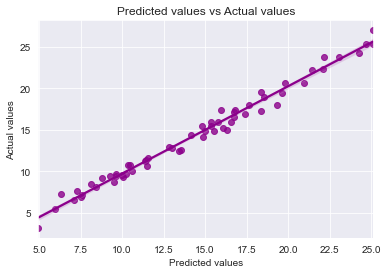

In [86]:
# plotting the prediction and actual values
plt.title("Predicted values vs Actual values")
sns.regplot(tuned_pred,ytest,color='darkmagenta')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

The above plot shows that the final model is a very good fit with the data point, hence random forest is a good model for this problem statement.

### Saving the Tuned model

In [82]:
import joblib
joblib.dump(tuned_model,'Advertising_Model.pkl')

['Advertising_Model.pkl']